In [4]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
from options_freedom.symbol.vix import vix

In [5]:
# open methods
dir_path = os.getcwd()
def gen_results_path(filename: str):
    return os.path.join(dir_path, "data/bull_put_spread", filename)

In [6]:
filename = "BullPutSpread_30_15_45_25_100_50_ligth"

In [7]:
with open(gen_results_path(filename), "rb") as f:
    trades = pickle.load(f)
len(trades)

53

In [8]:
dates = list(trades.keys())
profits = [t['profit_loss'] for t in trades.values()]
p_l_cumm = np.cumsum(profits)

### Plotting

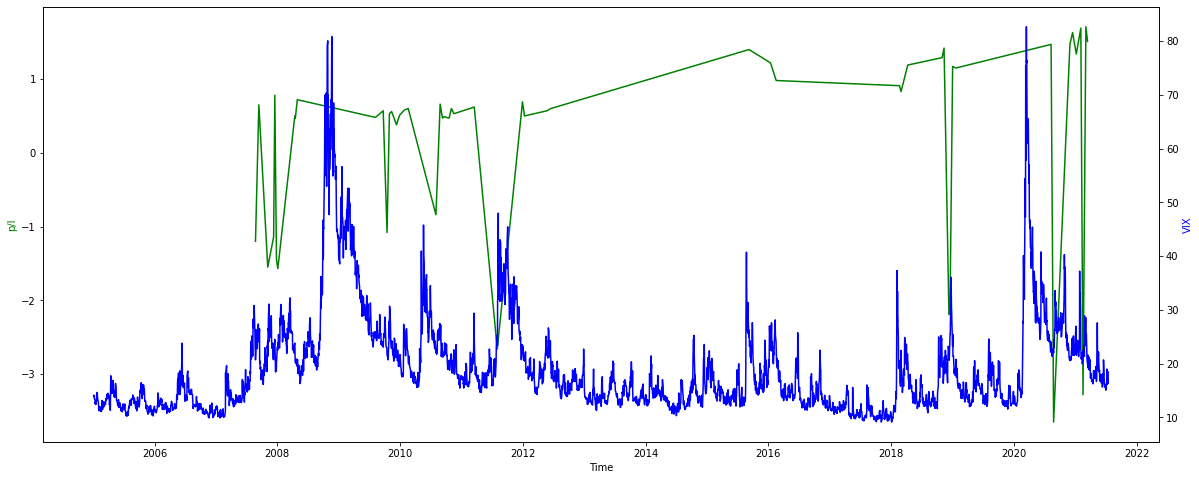

In [9]:
fig, ax1 = plt.subplots(figsize=(20,8))

ax2 = ax1.twinx()
ax1.plot(dates, profits, 'g-')
ax2.plot(vix._df['time_stamp'], vix._df['bid'], 'b-')

ax1.set_xlabel('Time')
ax1.set_ylabel('p/l', color='g')
ax2.set_ylabel('VIX', color='b')

plt.show()

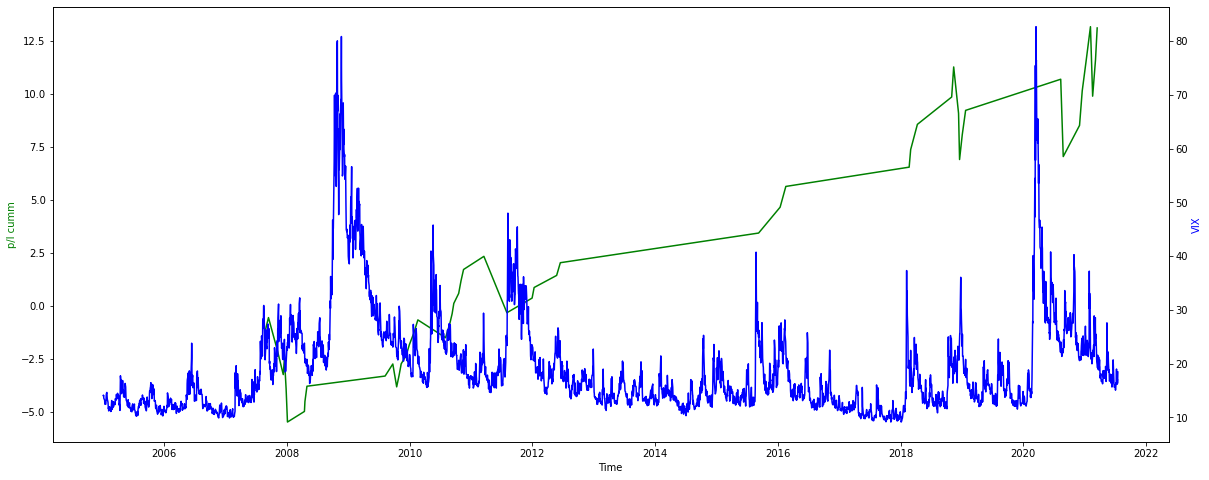

In [10]:
fig, ax1 = plt.subplots(figsize=(20,8))

ax2 = ax1.twinx()
ax1.plot(dates, p_l_cumm, 'g-')
ax2.plot(vix._df['time_stamp'], vix._df['bid'], 'b-')

ax1.set_xlabel('Time')
ax1.set_ylabel('p/l cumm', color='g')
ax2.set_ylabel('VIX', color='b')

plt.show()

In [11]:
total_p_l = sum([x for x in profits if x is not None])
print(f'Total P/L: {total_p_l}')

Total P/L: 13.120000000000001


In [12]:
average = total_p_l / len(profits)
print(f'Average profit: {average}')

Average profit: 0.24754716981132077


In [13]:
average_max_loss = sum([t['max_loss'] for t in trades.values()]) / len(list(trades.values()))
print(f"Average max loss: {average_max_loss}")

Average max loss: 9.936226415094346


In [14]:
average_max_profit = sum([t['max_profit'] for t in trades.values()]) / len(list(trades.values()))
print(f"Average max profit: {average_max_profit}")

Average max profit: 1.5473584905660376


In [15]:
anualized_return = (total_p_l/average_max_loss)**(1/(2021-2006))
print(f"Anualized return: {anualized_return}")

Anualized return: 1.0187027777968305
